<a href="https://colab.research.google.com/github/LauraGeiger/Cerebellar-Learning/blob/main/ANNarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ANNarchy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.7/505.7 kB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ANNarchy: filename=ANNarchy-4.8.2.3-cp311-cp311-linux_x86_64.whl size=2148498 sha256=4573ecae9b49de12355e75d392b82ad610a3bcec2ef2d546e7425b1d643f17f0
  Stored in directory: /root/.cache/pip/wheels/f4/c0/4c/b40ff9af74a8eefc7f4fb855fdc6d02de0573c56e2b59416bd
Successfully built ANNarchy


In [2]:
from ANNarchy import *

ANNarchy 4.8 (4.8.2.3) on linux (posix).


Compiling ...  OK 
Simulating 1.0 seconds of the network took 0.129957914352417 seconds. 


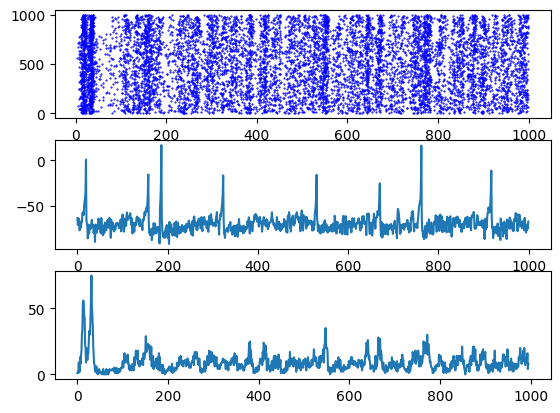

In [3]:
# Create the excitatory and inhibitory population
pop = Population(geometry=1000, neuron=Izhikevich)
Exc = pop[:800]                 ; Inh = pop[800:]

# Set the population parameters
re = np.random.random(800)      ; ri = np.random.random(200)
Exc.noise = 5.0                 ; Inh.noise = 2.0
Exc.a = 0.02                    ; Inh.a = 0.02 + 0.08 * ri
Exc.b = 0.2                     ; Inh.b = 0.25 - 0.05 * ri
Exc.c = -65.0 + 15.0 * re**2    ; Inh.c = -65.0
Exc.d = 8.0 - 6.0 * re**2       ; Inh.d = 2.0
Exc.v = -65.0                   ; Inh.v = -65.0
Exc.u = Exc.v * Exc.b           ; Inh.u = Inh.v * Inh.b

# Create the projections
exc_proj = Projection(pre=Exc, post=pop, target='exc')
exc_proj.connect_all_to_all(weights=Uniform(0.0, 0.5))

inh_proj = Projection(pre=Inh, post=pop, target='inh')
inh_proj.connect_all_to_all(weights=Uniform(0.0, 1.0))

# Compile
compile()

# Start recording the spikes in the network to produce the plots
M = Monitor(pop, ['spike', 'v'])

# Simulate 1 second
simulate(1000.0, measure_time=True)

# Retrieve the spike recordings and the membrane potential
spikes = M.get('spike')
v = M.get('v')

# Compute the raster plot
t, n = M.raster_plot(spikes)

# Compute the population firing rate
fr = M.histogram(spikes)

# Plot the results
import matplotlib.pyplot as plt
ax = plt.subplot(3,1,1)
ax.plot(t, n, 'b.', markersize=1.0)
ax = plt.subplot(3,1,2)
ax.plot(v[:, 15])
ax = plt.subplot(3,1,3)
ax.plot(fr)
plt.show()